# U7 - Abdullah Barhoum (5041774), Katharina Müller (5284090)


# Assignment 7: Backpropagation
Read the Rojas book (https://page.mi.fu-berlin.de/rojas/neural/neuron.pdf), chapter 7.3.3 and learn about the "matrix way" of implementing backprop. 

## Ex. 7.1 XOR
Implement a two-layer artificial neural network with two input neurons and one output neuron. Choose the number of hidden neurons to your liking and add an error "neuron" to your network. Our goal is to learn the XOR function. What does the network return for random weights of all combinations of (binary) inputs? **(RESULT)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Linear():
    def __init__(self, num_in, num_out):
        self.w = np.random.randn(num_in, num_out) * np.sqrt(2. / (num_in + num_out))
        self.b = np.random.randn(num_out)

    def forward(self, x):
        self.input = x
        return np.dot(x, self.w) + self.b

    def backward(self, error):
        prev_err = np.dot(error, self.w.T)
        self.b -= LEARNING_RATE * error
        self.w -= LEARNING_RATE * np.outer(self.input, error)
        return prev_err


class Sigmoid():
    def forward(self, x):
        output = 1.0 / (1.0 + np.exp(-x))
        self.output = output
        return output

    def backward(self, error):
        derivative = self.output * (1 - self.output)
        return derivative * error


class Model():
    def __init__(self, layers):
        self.layers = layers

    def forward(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def backward(self, err):
        for layer in reversed(self.layers):
            err = layer.backward(err)
        return err

In [2]:
model = Model([Linear(2, 3), Sigmoid(), Linear(3, 1), Sigmoid()])
for x in [(0, 0), (0, 1), (1, 0), (1, 1)]:
    pred = model.forward(np.array(x))
    print('input ', x, 'output', pred)

input  (0, 0) output [0.05851755]
input  (0, 1) output [0.05107412]
input  (1, 0) output [0.06270694]
input  (1, 1) output [0.05210312]


## Ex. 7.2 Backpropagation
Implement Backpropagation and optimize the weights of your neural network using the XOR training set.
How many training iterations do you need? Plot the network error over the number of iterations! **(RESULT)**

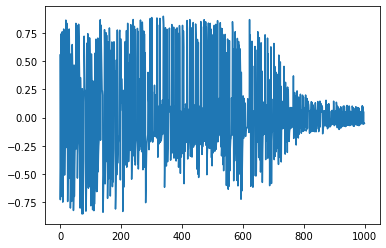

input  (0, 0) output 0.05487331806806697
input  (0, 1) output 0.9507118429373779
input  (1, 0) output 0.949636494512182
input  (1, 1) output 0.09711177754184225


In [3]:
def get_XOR():
    x = np.random.choice([0, 1], 2)
    y = (np.sum(x) == 1) | 0
    return np.array(x), np.array(y)

model = Model([Linear(2, 3), Sigmoid(), Linear(3, 1), Sigmoid()])

LEARNING_RATE = 5
errors = []
for i in range(1000):
    x, y = get_XOR()
    pred = model.forward(x)
    error = pred - y
    model.backward(error)
    errors.append(error[0])
    
plt.plot(errors)
plt.show()

for x in [(0, 0), (0, 1), (1, 0), (1, 1)]:
    pred = model.forward(np.array(x))
    print('input ', x, 'output', pred[0])

# Ex. 7.3 MNIST (BONUS)
Train your network on the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) and state the model accuracy (or the model error) for the training and test sets. **(RESULT)** Compare to this [list](https://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#4d4e495354)
